# Analyze Metrics and Conduct Inference.ipynb

In [97]:
import pandas as pd
from Analysis_Functions import *


In [98]:
# Load plot_settings.pickle
import pickle

with open('order_list.pkl', 'rb') as f:
    order_list = pickle.load(f)
print(order_list)

with open('hue_order_pub_date_no_dp.pkl', 'rb') as f:
    hue_order_pub_date_no_dp = pickle.load(f)
print(hue_order_pub_date_no_dp)

with open('hue_order_pub_date.pkl', 'rb') as f:
    hue_order_pub_date = pickle.load(f)
print(hue_order_pub_date)

with open('hue_order_introduced.pkl', 'rb') as f:
    hue_order_introduced = pickle.load(f)
print(hue_order_introduced)

# Set the font to Times New Roman or a similar serif font
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
# Optionally, set the font size
mpl.rcParams['font.size'] = 12

# Figure size
f_size = (16 / 2, 9 / 2)

# Function necessary to flip the legend
import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])


['Text-Davinci-003', 'GPT-4']
['Manual Few-Shot', 'Manual CoT', 'Least-to-Most', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Self-Refine', 'Tree-of-Thought']
['Manual Few-Shot', 'Manual CoT', 'Least-to-Most', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Self-Refine', 'Tree-of-Thought', 'Direct Prompting']
['Direct Prompting', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Tree-of-Thought', 'Self-Refine', 'Least-to-Most', 'Manual Few-Shot', 'Manual CoT']


In [99]:
# Load Combined_Data.xlsx
combined_data = pd.read_excel('Combined_Data.xlsx')

# GSM8k data - limit to task = "gsm8k"
gsm8k_data = combined_data[combined_data['task'] == 'gsm8k']

# Creative writing data - limit to task = "cw"
cw_data = combined_data[combined_data['task'] == 'cw']


In [100]:
# For convenience in this file, set model, method, task to Model, Method, Task in all datasets
# Rename Model, Method, Task columns to model, method, task

# Save version with old names
combined_data_old_names = combined_data.copy()

combined_data = combined_data.rename(columns={'model': 'old_model', 'method': 'old_method', 'task': 'old_task'}).rename(columns={'Model': 'model', 'Method': 'method', 'Task': 'task'})
gsm8k_data = gsm8k_data.rename(columns={'model': 'old_model', 'method': 'old_method', 'task': 'old_task'}).rename(columns={'Model': 'model', 'Method': 'method', 'Task': 'task'})
cw_data = cw_data.rename(columns={'model': 'old_model', 'method': 'old_method', 'task': 'old_task'}).rename(columns={'Model': 'model', 'Method': 'method', 'Task': 'task'})


In [101]:
combined_data


,model_task_method,conversation_number,coherence_1_incoherent_10_very_coherent,compliance_OLD,ease_of_review_1_easy_10_hard,correct,Prediction_Based_On_First_10,Prediction_Based_On_Last_10,Aggregated_Prediction,Prediction_Based_On_First_10_LP,...,num_linebreaks_prompts_diff,num_sentences_prompts_diff,num_step_i_prompts_diff,num_1_dot_etc_prompts_diff,sentence_length_prompts_diff,fres_prompts_diff,num_linebreaks_provided_diff,num_sentences_provided_diff,num_step_i_provided_diff,num_1_dot_etc_provided_diff
0,td3_cw_direct_prompting_responses,1,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,...,1,2,0,-2,5.971429,-12.31,NaN,NaN,NaN,NaN
1,td3_cw_direct_prompting_responses,2,7.0,0.0,1.0,NaN,NaN,7.0,7.0,NaN,...,1,3,0,-2,9.350000,1.05,NaN,NaN,NaN,NaN
2,td3_cw_direct_prompting_responses,3,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,...,1,4,0,-2,4.533333,6.64,NaN,NaN,NaN,NaN
3,td3_cw_direct_prompting_responses,4,10.0,1.0,1.0,NaN,NaN,7.0,7.0,NaN,...,1,1,0,-2,9.533333,9.31,NaN,NaN,NaN,NaN
4,td3_cw_direct_prompting_responses,5,4.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,...,1,2,0,-2,7.828571,-13.64,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,gpt4_gsm8k_manual_cot_responses,96,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,-16,-39,0,-17,NaN,NaN,-4.0,1.0,0.0,2.0
3196,gpt4_gsm8k_manual_cot_responses,97,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,-16,-43,0,-19,NaN,NaN,-2.0,0.0,0.0,1.0
3197,gpt4_gsm8k_manual_cot_responses,98,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,-16,-44,0,-20,NaN,NaN,-3.0,-1.0,0.0,0.0
3198,gpt4_gsm8k_manual_cot_responses,99,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,-15,-44,0,-19,NaN,NaN,-1.0,0.0,0.0,1.0


## Length

Combined table for length of entire interaction, length of all prompts, financial cost

Baseline comparison ratios, change in accuracy/quality plots

### Table of Length Metrics

Table of 3 with significance stars. See acc/qual code.

In [102]:
# means_table(combined_data, 'conversation_length')
# means_table(combined_data, 'input_length')
# means_table(combined_data, 'conversation_cost')


In [103]:
# In combined_data, keep columns
limited_combined_data = combined_data_old_names[['Model', 'Method', 'Task', 'model', 'method', 'task', 'conversation_length', 'input_length', 'conversation_cost']]

# Stack by Model and Method
stacked_combined_data = limited_combined_data.set_index(['Model', 'Method', 'Task', 'model', 'method', 'task']).stack().reset_index().rename(columns = {'level_6': 'metric', 0: 'Value'})

stacked_combined_data


,Model,Method,Task,model,method,task,metric,Value
0,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,conversation_length,177.00000
1,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,input_length,52.00000
2,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,conversation_cost,0.00354
3,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,conversation_length,240.00000
4,Text-Davinci-003,Direct Prompting,Creative Writing,td3,direct_prompting,cw,input_length,62.00000
...,...,...,...,...,...,...,...,...
9595,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,input_length,776.00000
9596,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,conversation_cost,0.02922
9597,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,conversation_length,860.00000
9598,GPT-4,Manual CoT,GSM8K,gpt4,manual_cot,gsm8k,input_length,765.00000


In [104]:
# Average Value by model, method, metric
# Also get variance
avg_metric_with_variance = stacked_combined_data.groupby(['Model', 'Method', 'Task', 'model', 'method', 'task', 'metric']).agg(['mean', 'var'])['Value'].reset_index()

# Convert the variance to standard deviation
avg_metric_with_variance['sd'] = avg_metric_with_variance['var'] ** 0.5
# Drop the variance column
avg_metric_with_variance = avg_metric_with_variance.drop(columns=['var'])

avg_metric_with_variance


,Model,Method,Task,model,method,task,metric,mean,sd
0,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,conversation_cost,0.025697,0.003156
1,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,conversation_length,470.720000,53.056874
2,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,input_length,84.890000,7.453418
3,GPT-4,APE Zero-Shot CoT,GSM8K,gpt4,ape_zero_shot_cot,gsm8k,conversation_cost,0.011831,0.003227
4,GPT-4,APE Zero-Shot CoT,GSM8K,gpt4,ape_zero_shot_cot,gsm8k,conversation_length,243.930000,58.878793
...,...,...,...,...,...,...,...,...,...
91,Text-Davinci-003,Zero-Shot CoT,Creative Writing,td3,zero_shot_cot,cw,conversation_length,256.530000,46.982364
92,Text-Davinci-003,Zero-Shot CoT,Creative Writing,td3,zero_shot_cot,cw,input_length,63.490000,7.696903
93,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,conversation_cost,0.003320,0.000944
94,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,conversation_length,166.020000,47.204045


In [105]:
# Add significance
# Load all_inference.xlsx
all_inference = pd.read_excel('all_inference.xlsx')

# Merge with avg_metric_with_variance
avg_metric_with_variance = pd.merge(avg_metric_with_variance, all_inference, how = 'left', on = ['model', 'method', 'task', 'metric'])

# Create column stars if Significant at 95% == "Yes"
avg_metric_with_variance['stars'] = avg_metric_with_variance['Significant at 95%'].apply(lambda x: '*' if x == 'Yes' else '')

avg_metric_with_variance


,Model,Method,Task,model,method,task,metric,mean,sd,statistic,pvalue,statistic_with_correction,pvalue_with_correction,Significant at 95%,dp_mean,using_method_mean,stars
0,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,conversation_cost,0.025697,0.003156,-18.178939,2.583587e-33,NaN,NaN,Yes,0.018263,0.025697,*
1,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,conversation_length,470.720000,53.056874,-19.572916,8.327800e-36,NaN,NaN,Yes,337.330000,470.720000,*
2,GPT-4,APE Zero-Shot CoT,Creative Writing,gpt4,ape_zero_shot_cot,cw,input_length,84.890000,7.453418,-inf,0.000000e+00,NaN,NaN,Yes,65.890000,84.890000,*
3,GPT-4,APE Zero-Shot CoT,GSM8K,gpt4,ape_zero_shot_cot,gsm8k,conversation_cost,0.011831,0.003227,-14.156992,1.570757e-25,NaN,NaN,Yes,0.006626,0.011831,*
4,GPT-4,APE Zero-Shot CoT,GSM8K,gpt4,ape_zero_shot_cot,gsm8k,conversation_length,243.930000,58.878793,-15.870716,5.914916e-29,NaN,NaN,Yes,146.690000,243.930000,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Text-Davinci-003,Zero-Shot CoT,Creative Writing,td3,zero_shot_cot,cw,conversation_length,256.530000,46.982364,-11.401386,9.900006e-20,NaN,NaN,Yes,200.410000,256.530000,*
92,Text-Davinci-003,Zero-Shot CoT,Creative Writing,td3,zero_shot_cot,cw,input_length,63.490000,7.696903,-inf,0.000000e+00,NaN,NaN,Yes,52.490000,63.490000,*
93,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,conversation_cost,0.003320,0.000944,-17.923779,7.581304e-33,NaN,NaN,Yes,0.001741,0.003320,*
94,Text-Davinci-003,Zero-Shot CoT,GSM8K,td3,zero_shot_cot,gsm8k,conversation_length,166.020000,47.204045,-17.923779,7.581304e-33,NaN,NaN,Yes,87.060000,166.020000,*


In [106]:
# Combine mean and variance into one column that is a string with the mean and then the variance in parentheses
avg_metric_with_variance['Value'] = avg_metric_with_variance.apply(lambda row: str(round(row['mean'], 3)) + row['stars'] + ' (' + str(round(row['sd'], 3)) + ')', axis=1)
# But set Value to just be mean if metric is compliance or correct
avg_metric_with_variance.loc[avg_metric_with_variance['metric'].isin(['compliance', 'correct']), 'Value'] = avg_metric_with_variance['mean'].round(2).astype(str) + avg_metric_with_variance['stars']

# Drop mean and variance columns, other columns
avg_metric_with_variance = avg_metric_with_variance[['Model', 'Method', 'Task', 'metric', 'Value']].rename(columns = {'metric': 'Metric'})

avg_metric_with_variance


,Model,Method,Task,Metric,Value
0,GPT-4,APE Zero-Shot CoT,Creative Writing,conversation_cost,0.026* (0.003)
1,GPT-4,APE Zero-Shot CoT,Creative Writing,conversation_length,470.72* (53.057)
2,GPT-4,APE Zero-Shot CoT,Creative Writing,input_length,84.89* (7.453)
3,GPT-4,APE Zero-Shot CoT,GSM8K,conversation_cost,0.012* (0.003)
4,GPT-4,APE Zero-Shot CoT,GSM8K,conversation_length,243.93* (58.879)
...,...,...,...,...,...
91,Text-Davinci-003,Zero-Shot CoT,Creative Writing,conversation_length,256.53* (46.982)
92,Text-Davinci-003,Zero-Shot CoT,Creative Writing,input_length,63.49* (7.697)
93,Text-Davinci-003,Zero-Shot CoT,GSM8K,conversation_cost,0.003* (0.001)
94,Text-Davinci-003,Zero-Shot CoT,GSM8K,conversation_length,166.02* (47.204)


In [107]:
# Pivot table - column method should go wide
avg_metric_pivot = avg_metric_with_variance.set_index(['Task', 'Metric', 'Model', 'Method']).unstack()
#pivot_table(index=['model', 'task'], columns='method', values='accuracy_quality').reset_index()

# Fix axis
avg_metric_pivot = avg_metric_pivot.rename_axis([None, None], axis=1).reset_index()

avg_metric_pivot


Task               Metric             Model             Value  \
                                                            APE Zero-Shot CoT   
0   Creative Writing    conversation_cost             GPT-4    0.026* (0.003)   
1   Creative Writing    conversation_cost  Text-Davinci-003    0.005* (0.001)   
2   Creative Writing  conversation_length             GPT-4  470.72* (53.057)   
3   Creative Writing  conversation_length  Text-Davinci-003  274.04* (58.593)   
4   Creative Writing         input_length             GPT-4    84.89* (7.453)   
5   Creative Writing         input_length  Text-Davinci-003    73.49* (7.697)   
6              GSM8K    conversation_cost             GPT-4    0.012* (0.003)   
7              GSM8K    conversation_cost  Text-Davinci-003    0.004* (0.001)   
8              GSM8K  conversation_length             GPT-4  243.93* (58.879)   
9              GSM8K  conversation_length  Text-Davinci-003  181.76* (54.995)   
10             GSM8K         input_length             GPT-4    93.5* (21.012)   
11             GSM8K         input_length  Text-Davinci-003   80.48* (21.043)   

                                                                            \
   Direct Prompting      Least-to-Most        Manual CoT   Manual Few-Shot   
0     0.018 (0.003)     0.043* (0.003)    0.037* (0.003)    0.029* (0.002)   
1     0.004 (0.001)     0.021* (0.001)    0.019* (0.001)    0.014* (0.001)   
2   337.33 (43.738)  1091.41* (46.794)  968.75* (55.611)  751.04* (35.272)   
3   200.41 (30.565)  1025.02* (34.559)  960.51* (36.447)  695.41* (31.517)   
4     65.89 (7.453)    754.89* (7.453)   701.89* (7.453)   522.21* (7.492)   
5     52.49 (7.697)    736.49* (7.697)   683.49* (7.697)   504.49* (7.697)   
6     0.007 (0.004)     0.014* (0.003)    0.029* (0.003)    0.018* (0.001)   
7     0.002 (0.001)     0.005* (0.001)    0.014* (0.001)      0.011* (0.0)   
8   146.69 (79.543)   332.36* (58.196)   850.04* (50.96)  579.69* (21.036)   
9    87.06 (42.023)   272.27* (49.824)   722.7* (35.469)  533.94* (21.162)   
10    72.5 (21.012)    181.5* (21.012)   741.5* (21.012)   567.5* (21.012)   
11   59.48 (21.043)   158.48* (21.043)  655.48* (21.043)  531.48* (21.043)   

                                                             
          Self-Refine     Tree-of-Thought     Zero-Shot CoT  
0      0.026* (0.011)      0.072* (0.009)    0.025* (0.003)  
1      0.008* (0.003)      0.018* (0.003)    0.005* (0.001)  
2    520.06* (210.22)  1325.17* (158.559)  459.98* (49.628)  
3   382.19* (141.596)   916.81* (157.042)  256.53* (46.982)  
4    160.37* (43.864)     264.89* (7.453)    75.21* (7.492)  
5    140.48* (38.088)     209.49* (7.697)    63.49* (7.697)  
6      0.016* (0.006)      0.034* (0.014)    0.011* (0.003)  
7      0.003* (0.001)      0.005* (0.002)    0.003* (0.001)  
8   344.86* (116.243)   764.72* (312.361)  223.88* (59.148)  
9    125.99* (36.175)    248.8* (116.245)  166.02* (47.204)  
10    167.7* (38.215)   407.42* (154.353)    80.5* (21.012)  
11    99.48* (21.043)    137.68* (77.523)   67.48* (21.043)

In [108]:
# Recode Metric column
avg_metric_pivot['Metric'] = avg_metric_pivot['Metric'].replace({'conversation_length': 'Conversation Length', 'input_length': 'Input Length', 'conversation_cost': 'Conversation Cost'})

avg_metric_pivot


Task               Metric             Model             Value  \
                                                            APE Zero-Shot CoT   
0   Creative Writing    Conversation Cost             GPT-4    0.026* (0.003)   
1   Creative Writing    Conversation Cost  Text-Davinci-003    0.005* (0.001)   
2   Creative Writing  Conversation Length             GPT-4  470.72* (53.057)   
3   Creative Writing  Conversation Length  Text-Davinci-003  274.04* (58.593)   
4   Creative Writing         Input Length             GPT-4    84.89* (7.453)   
5   Creative Writing         Input Length  Text-Davinci-003    73.49* (7.697)   
6              GSM8K    Conversation Cost             GPT-4    0.012* (0.003)   
7              GSM8K    Conversation Cost  Text-Davinci-003    0.004* (0.001)   
8              GSM8K  Conversation Length             GPT-4  243.93* (58.879)   
9              GSM8K  Conversation Length  Text-Davinci-003  181.76* (54.995)   
10             GSM8K         Input Length             GPT-4    93.5* (21.012)   
11             GSM8K         Input Length  Text-Davinci-003   80.48* (21.043)   

                                                                            \
   Direct Prompting      Least-to-Most        Manual CoT   Manual Few-Shot   
0     0.018 (0.003)     0.043* (0.003)    0.037* (0.003)    0.029* (0.002)   
1     0.004 (0.001)     0.021* (0.001)    0.019* (0.001)    0.014* (0.001)   
2   337.33 (43.738)  1091.41* (46.794)  968.75* (55.611)  751.04* (35.272)   
3   200.41 (30.565)  1025.02* (34.559)  960.51* (36.447)  695.41* (31.517)   
4     65.89 (7.453)    754.89* (7.453)   701.89* (7.453)   522.21* (7.492)   
5     52.49 (7.697)    736.49* (7.697)   683.49* (7.697)   504.49* (7.697)   
6     0.007 (0.004)     0.014* (0.003)    0.029* (0.003)    0.018* (0.001)   
7     0.002 (0.001)     0.005* (0.001)    0.014* (0.001)      0.011* (0.0)   
8   146.69 (79.543)   332.36* (58.196)   850.04* (50.96)  579.69* (21.036)   
9    87.06 (42.023)   272.27* (49.824)   722.7* (35.469)  533.94* (21.162)   
10    72.5 (21.012)    181.5* (21.012)   741.5* (21.012)   567.5* (21.012)   
11   59.48 (21.043)   158.48* (21.043)  655.48* (21.043)  531.48* (21.043)   

                                                             
          Self-Refine     Tree-of-Thought     Zero-Shot CoT  
0      0.026* (0.011)      0.072* (0.009)    0.025* (0.003)  
1      0.008* (0.003)      0.018* (0.003)    0.005* (0.001)  
2    520.06* (210.22)  1325.17* (158.559)  459.98* (49.628)  
3   382.19* (141.596)   916.81* (157.042)  256.53* (46.982)  
4    160.37* (43.864)     264.89* (7.453)    75.21* (7.492)  
5    140.48* (38.088)     209.49* (7.697)    63.49* (7.697)  
6      0.016* (0.006)      0.034* (0.014)    0.011* (0.003)  
7      0.003* (0.001)      0.005* (0.002)    0.003* (0.001)  
8   344.86* (116.243)   764.72* (312.361)  223.88* (59.148)  
9    125.99* (36.175)    248.8* (116.245)  166.02* (47.204)  
10    167.7* (38.215)   407.42* (154.353)    80.5* (21.012)  
11    99.48* (21.043)    137.68* (77.523)   67.48* (21.043)

In [109]:
# Flatten columns
flattened_cols = [''.join(col).strip().replace('Value', '') for col in avg_metric_pivot.columns.values]
avg_metric_pivot.columns = flattened_cols

avg_metric_pivot


,Task,Metric,Model,APE Zero-Shot CoT,Direct Prompting,Least-to-Most,Manual CoT,Manual Few-Shot,Self-Refine,Tree-of-Thought,Zero-Shot CoT
0,Creative Writing,Conversation Cost,GPT-4,0.026* (0.003),0.018 (0.003),0.043* (0.003),0.037* (0.003),0.029* (0.002),0.026* (0.011),0.072* (0.009),0.025* (0.003)
1,Creative Writing,Conversation Cost,Text-Davinci-003,0.005* (0.001),0.004 (0.001),0.021* (0.001),0.019* (0.001),0.014* (0.001),0.008* (0.003),0.018* (0.003),0.005* (0.001)
2,Creative Writing,Conversation Length,GPT-4,470.72* (53.057),337.33 (43.738),1091.41* (46.794),968.75* (55.611),751.04* (35.272),520.06* (210.22),1325.17* (158.559),459.98* (49.628)
3,Creative Writing,Conversation Length,Text-Davinci-003,274.04* (58.593),200.41 (30.565),1025.02* (34.559),960.51* (36.447),695.41* (31.517),382.19* (141.596),916.81* (157.042),256.53* (46.982)
4,Creative Writing,Input Length,GPT-4,84.89* (7.453),65.89 (7.453),754.89* (7.453),701.89* (7.453),522.21* (7.492),160.37* (43.864),264.89* (7.453),75.21* (7.492)
5,Creative Writing,Input Length,Text-Davinci-003,73.49* (7.697),52.49 (7.697),736.49* (7.697),683.49* (7.697),504.49* (7.697),140.48* (38.088),209.49* (7.697),63.49* (7.697)
6,GSM8K,Conversation Cost,GPT-4,0.012* (0.003),0.007 (0.004),0.014* (0.003),0.029* (0.003),0.018* (0.001),0.016* (0.006),0.034* (0.014),0.011* (0.003)
7,GSM8K,Conversation Cost,Text-Davinci-003,0.004* (0.001),0.002 (0.001),0.005* (0.001),0.014* (0.001),0.011* (0.0),0.003* (0.001),0.005* (0.002),0.003* (0.001)
8,GSM8K,Conversation Length,GPT-4,243.93* (58.879),146.69 (79.543),332.36* (58.196),850.04* (50.96),579.69* (21.036),344.86* (116.243),764.72* (312.361),223.88* (59.148)
9,GSM8K,Conversation Length,Text-Davinci-003,181.76* (54.995),87.06 (42.023),272.27* (49.824),722.7* (35.469),533.94* (21.162),125.99* (36.175),248.8* (116.245),166.02* (47.204)


In [110]:
# Print values of Metric
avg_metric_pivot['Metric'].unique()


array(['Conversation Cost', 'Conversation Length', 'Input Length'],
      dtype=object)

In [111]:
# Sort rows
avg_metric_pivot['Task'] = pd.Categorical(avg_metric_pivot['Task'], ["GSM8K", "Creative Writing"])
avg_metric_pivot['Metric'] = pd.Categorical(avg_metric_pivot['Metric'], ["Conversation Length", "Input Length", "Conversation Cost"])
avg_metric_pivot['Model'] = pd.Categorical(avg_metric_pivot['Model'], ["Text-Davinci-003", "GPT-4"])
avg_metric_pivot = avg_metric_pivot.sort_values(by=['Task', 'Metric', 'Model'])

print(avg_metric_pivot.columns)
avg_metric_pivot


Index(['Task', 'Metric', 'Model', 'APE Zero-Shot CoT', 'Direct Prompting',
       'Least-to-Most', 'Manual CoT', 'Manual Few-Shot', 'Self-Refine',
       'Tree-of-Thought', 'Zero-Shot CoT'],
      dtype='object')


,Task,Metric,Model,APE Zero-Shot CoT,Direct Prompting,Least-to-Most,Manual CoT,Manual Few-Shot,Self-Refine,Tree-of-Thought,Zero-Shot CoT
9,GSM8K,Conversation Length,Text-Davinci-003,181.76* (54.995),87.06 (42.023),272.27* (49.824),722.7* (35.469),533.94* (21.162),125.99* (36.175),248.8* (116.245),166.02* (47.204)
8,GSM8K,Conversation Length,GPT-4,243.93* (58.879),146.69 (79.543),332.36* (58.196),850.04* (50.96),579.69* (21.036),344.86* (116.243),764.72* (312.361),223.88* (59.148)
11,GSM8K,Input Length,Text-Davinci-003,80.48* (21.043),59.48 (21.043),158.48* (21.043),655.48* (21.043),531.48* (21.043),99.48* (21.043),137.68* (77.523),67.48* (21.043)
10,GSM8K,Input Length,GPT-4,93.5* (21.012),72.5 (21.012),181.5* (21.012),741.5* (21.012),567.5* (21.012),167.7* (38.215),407.42* (154.353),80.5* (21.012)
7,GSM8K,Conversation Cost,Text-Davinci-003,0.004* (0.001),0.002 (0.001),0.005* (0.001),0.014* (0.001),0.011* (0.0),0.003* (0.001),0.005* (0.002),0.003* (0.001)
6,GSM8K,Conversation Cost,GPT-4,0.012* (0.003),0.007 (0.004),0.014* (0.003),0.029* (0.003),0.018* (0.001),0.016* (0.006),0.034* (0.014),0.011* (0.003)
3,Creative Writing,Conversation Length,Text-Davinci-003,274.04* (58.593),200.41 (30.565),1025.02* (34.559),960.51* (36.447),695.41* (31.517),382.19* (141.596),916.81* (157.042),256.53* (46.982)
2,Creative Writing,Conversation Length,GPT-4,470.72* (53.057),337.33 (43.738),1091.41* (46.794),968.75* (55.611),751.04* (35.272),520.06* (210.22),1325.17* (158.559),459.98* (49.628)
5,Creative Writing,Input Length,Text-Davinci-003,73.49* (7.697),52.49 (7.697),736.49* (7.697),683.49* (7.697),504.49* (7.697),140.48* (38.088),209.49* (7.697),63.49* (7.697)
4,Creative Writing,Input Length,GPT-4,84.89* (7.453),65.89 (7.453),754.89* (7.453),701.89* (7.453),522.21* (7.492),160.37* (43.864),264.89* (7.453),75.21* (7.492)


In [112]:
# Order columns
starter_col_order = ['Task', 'Metric', 'Model']
col_order = starter_col_order + hue_order_pub_date
print(col_order)
avg_metric_pivot = avg_metric_pivot[col_order]

# Convert Model, Task, Metric back to string from Categorical
avg_metric_pivot['Model'] = avg_metric_pivot['Model'].astype(str)
avg_metric_pivot['Task'] = avg_metric_pivot['Task'].astype(str)
avg_metric_pivot['Metric'] = avg_metric_pivot['Metric'].astype(str)

# Delete values of Task and Metric when they are not the first instance in the dataframe
output_table = avg_metric_pivot.copy()
output_table['Model'] = output_table['Model'].where(output_table['Model'] != output_table['Model'].shift(), '')
output_table['Task'] = output_table['Task'].where(output_table['Task'] != output_table['Task'].shift(), '')
output_table['Metric'] = output_table['Metric'].where(output_table['Metric'] != output_table['Metric'].shift(), '')

# Output to LaTeX
#output_table.to_latex('../Output/avg_accuracy_quality_pivot.tex', index=False)

# Output to latex. center columns, wrap text, and remove index
latex_string = output_table.to_latex(index=False, 
                      column_format='x{0.75cm}|x{1.5cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}', 
                      #booktabs = True
                      #longtable = True
                      )

# Add lines between rows
lines = latex_string.split('\n')
new_lines = []
for line in lines:
    new_lines.append(line)
    if '\\' in line and '&' in line:  # Identifies a row of the table
        new_lines.append('\\hline')
# Insert \\hline after \toprule
new_lines.insert(2, '\\hline')

# Rejoin the modified lines
modified_latex_table = '\n'.join(new_lines)

print(modified_latex_table)

# Save string to file
with open('../Output/avg_length_metrics_pivot.tex', 'w') as f:
    f.write(modified_latex_table)

output_table


['Task', 'Metric', 'Model', 'Manual Few-Shot', 'Manual CoT', 'Least-to-Most', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Self-Refine', 'Tree-of-Thought', 'Direct Prompting']
\begin{tabular}{x{0.75cm}|x{1.5cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}|x{0.75cm}}
\toprule
\hline
Task & Metric & Model & Manual Few-Shot & Manual CoT & Least-to-Most & Zero-Shot CoT & APE Zero-Shot CoT & Self-Refine & Tree-of-Thought & Direct Prompting \\
\hline
\midrule
GSM8K & Conversation Length & Text-Davinci-003 & 533.94* (21.162) & 722.7* (35.469) & 272.27* (49.824) & 166.02* (47.204) & 181.76* (54.995) & 125.99* (36.175) & 248.8* (116.245) & 87.06 (42.023) \\
\hline
 &  & GPT-4 & 579.69* (21.036) & 850.04* (50.96) & 332.36* (58.196) & 223.88* (59.148) & 243.93* (58.879) & 344.86* (116.243) & 764.72* (312.361) & 146.69 (79.543) \\
\hline
 & Input Length & Text-Davinci-003 & 531.48* (21.043) & 655.48* (21.043) & 158.48* (21.043) & 67.48* (21.043) & 80.48* (21.043) & 99.

,Task,Metric,Model,Manual Few-Shot,Manual CoT,Least-to-Most,Zero-Shot CoT,APE Zero-Shot CoT,Self-Refine,Tree-of-Thought,Direct Prompting
9,GSM8K,Conversation Length,Text-Davinci-003,533.94* (21.162),722.7* (35.469),272.27* (49.824),166.02* (47.204),181.76* (54.995),125.99* (36.175),248.8* (116.245),87.06 (42.023)
8,,,GPT-4,579.69* (21.036),850.04* (50.96),332.36* (58.196),223.88* (59.148),243.93* (58.879),344.86* (116.243),764.72* (312.361),146.69 (79.543)
11,,Input Length,Text-Davinci-003,531.48* (21.043),655.48* (21.043),158.48* (21.043),67.48* (21.043),80.48* (21.043),99.48* (21.043),137.68* (77.523),59.48 (21.043)
10,,,GPT-4,567.5* (21.012),741.5* (21.012),181.5* (21.012),80.5* (21.012),93.5* (21.012),167.7* (38.215),407.42* (154.353),72.5 (21.012)
7,,Conversation Cost,Text-Davinci-003,0.011* (0.0),0.014* (0.001),0.005* (0.001),0.003* (0.001),0.004* (0.001),0.003* (0.001),0.005* (0.002),0.002 (0.001)
6,,,GPT-4,0.018* (0.001),0.029* (0.003),0.014* (0.003),0.011* (0.003),0.012* (0.003),0.016* (0.006),0.034* (0.014),0.007 (0.004)
3,Creative Writing,Conversation Length,Text-Davinci-003,695.41* (31.517),960.51* (36.447),1025.02* (34.559),256.53* (46.982),274.04* (58.593),382.19* (141.596),916.81* (157.042),200.41 (30.565)
2,,,GPT-4,751.04* (35.272),968.75* (55.611),1091.41* (46.794),459.98* (49.628),470.72* (53.057),520.06* (210.22),1325.17* (158.559),337.33 (43.738)
5,,Input Length,Text-Davinci-003,504.49* (7.697),683.49* (7.697),736.49* (7.697),63.49* (7.697),73.49* (7.697),140.48* (38.088),209.49* (7.697),52.49 (7.697)
4,,,GPT-4,522.21* (7.492),701.89* (7.453),754.89* (7.453),75.21* (7.492),84.89* (7.453),160.37* (43.864),264.89* (7.453),65.89 (7.453)


### Length Versus Baseline

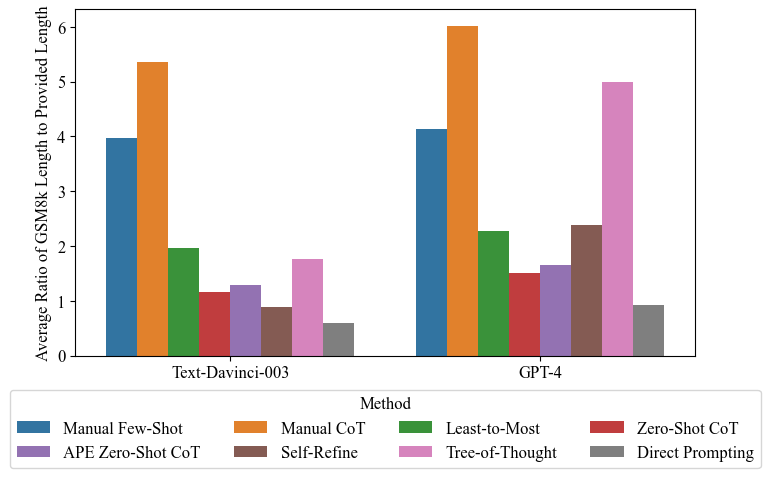

In [113]:
# Plot gsm8k_length_vs_provided in a bar chart
# Limit to gsm8k data
# Get means by model, method
gsm8k_length_vs_provided_means = gsm8k_data[['model', 'method', 'gsm8k_length_vs_provided']].groupby(['model', 'method']).agg(['mean'])['gsm8k_length_vs_provided'].reset_index()

# Bar chart by model, method
plt.figure(figsize=f_size)
sns.barplot(x='model', y='mean', hue='method', data=gsm8k_length_vs_provided_means, order=order_list, hue_order=hue_order_pub_date)
plt.xlabel('')
plt.ylabel('Average Ratio of GSM8k Length to Provided Length')
#plt.title('Average GSM8k Length vs. Provided Length by Model and Method')
# Legend title of Method
# Create legend filling rows first
handles, labels = plt.gca().get_legend_handles_labels()
num_cols = 4
plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
plt.savefig('../Output/gsm8k_length_vs_provided_means.png', bbox_inches='tight')
plt.show()


               model             method              task      mean
0              GPT-4  APE Zero-Shot CoT  Creative Writing  1.417973
1              GPT-4  APE Zero-Shot CoT             GSM8K  2.033913
2              GPT-4   Direct Prompting  Creative Writing  1.000000
3              GPT-4   Direct Prompting             GSM8K  1.000000
4              GPT-4      Least-to-Most  Creative Writing  3.285805
5              GPT-4      Least-to-Most             GSM8K  2.801521
6              GPT-4         Manual CoT  Creative Writing  2.916719
7              GPT-4         Manual CoT             GSM8K  7.454777
8              GPT-4    Manual Few-Shot  Creative Writing  2.261137
9              GPT-4    Manual Few-Shot             GSM8K  5.121804
10             GPT-4        Self-Refine  Creative Writing  1.554754
11             GPT-4        Self-Refine             GSM8K  3.020956
12             GPT-4    Tree-of-Thought  Creative Writing  3.978377
13             GPT-4    Tree-of-Thought         

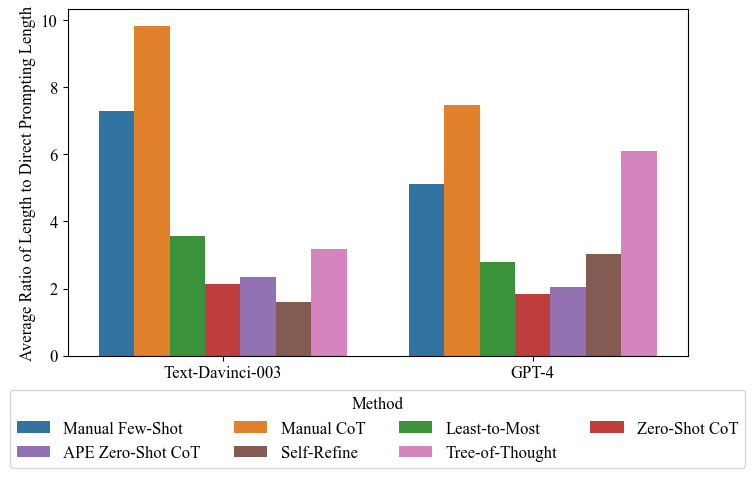

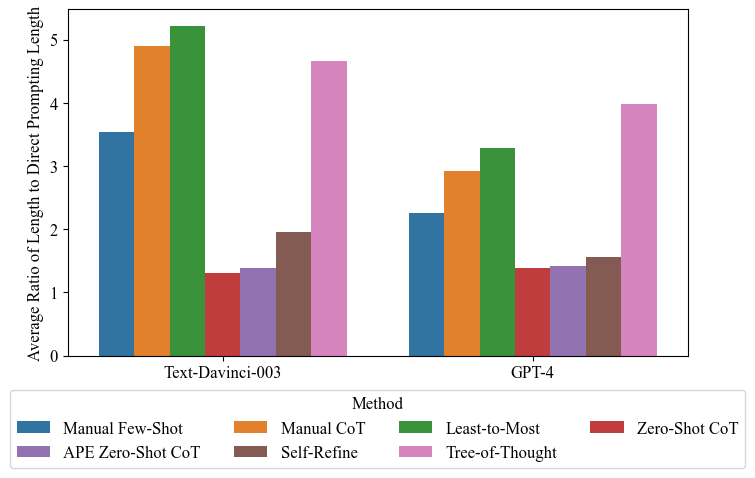

In [114]:
# Plot length_vs_direct_prompting in a bar chart
# Get means by model, method, task
length_vs_direct_prompting_means = combined_data[['model', 'method', 'task', 'length_vs_direct_prompting']].groupby(['model', 'method', 'task']).agg(['mean'])['length_vs_direct_prompting'].reset_index()

print(length_vs_direct_prompting_means)

# Bar chart by model, method, task

# GSM8k plot
plt.figure(figsize=f_size)
sns.barplot(x='model', y='mean', hue='method', data=length_vs_direct_prompting_means[length_vs_direct_prompting_means['task'] == 'GSM8K'], order=order_list, hue_order=hue_order_pub_date_no_dp)
plt.xlabel('')
plt.ylabel('Average Ratio of Length to Direct Prompting Length', fontsize=12)
#plt.title('Average GSM8k Length vs. Direct Prompting Length by Model and Method')
# Legend title of Method
# Create legend filling rows first
handles, labels = plt.gca().get_legend_handles_labels()
num_cols = 4
plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
plt.savefig('../Output/gsm8k_length_vs_direct_prompting_means.png', bbox_inches='tight')
plt.show()

# Creative writing plot
plt.figure(figsize=f_size)
sns.barplot(x='model', y='mean', hue='method', data=length_vs_direct_prompting_means[length_vs_direct_prompting_means['task'] == 'Creative Writing'], order=order_list, hue_order=hue_order_pub_date_no_dp)
plt.xlabel('')
plt.ylabel('Average Ratio of Length to Direct Prompting Length', fontsize=12)
#plt.title('Average Creative Writing Length vs. Direct Prompting Length by Model and Method')
# Legend title of Method
# Create legend filling rows first
handles, labels = plt.gca().get_legend_handles_labels()
num_cols = 4
plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
plt.savefig('../Output/cw_length_vs_direct_prompting_means.png', bbox_inches='tight')
plt.show()


### Gains

In [115]:
# Compute change in accuracy/quality per change in length (versus direct prompting)
direct_prompting_comparison = pd.read_excel('direct_prompting_comparison.xlsx')

# In the direct_prompting_comparison table, get averages of conversation_length, dp_conversation_length, accuracy_quality, dp_accuracy_quality by model, method, task
averages_for_changes = direct_prompting_comparison[['model', 'method', 'task', 'conversation_length', 'dp_conversation_length', 'accuracy_quality_avg_inter_paragraph_cosine_sim', 'dp_accuracy_quality_avg_inter_paragraph_cosine_sim']].groupby(['model', 'method', 'task']).agg(['mean']).reset_index()

# Compute change in accuracy_quality per change in conversation_length
# accuracy_quality - dp_accuracy_quality
# divided by
# conversation_length - dp_conversation_length
averages_for_changes['change_in_accuracy_quality_per_change_in_conversation_length'] = (averages_for_changes['accuracy_quality_avg_inter_paragraph_cosine_sim']['mean'] - averages_for_changes['dp_accuracy_quality_avg_inter_paragraph_cosine_sim']['mean']) / (averages_for_changes['conversation_length']['mean'] - averages_for_changes['dp_conversation_length']['mean'])


In [116]:
# Look just at change in accuracy quality
just_change_acc_qual = averages_for_changes
just_change_acc_qual['change_in_accuracy_quality'] = (just_change_acc_qual['accuracy_quality_avg_inter_paragraph_cosine_sim']['mean'] - just_change_acc_qual['dp_accuracy_quality_avg_inter_paragraph_cosine_sim']['mean'])
# Sort by task, method, model
#just_change_acc_qual = just_change_acc_qual.sort_values(by=['task', 'method', 'model']).reset_index().drop(columns=['index'])

just_change_acc_qual = just_change_acc_qual[['model', 'method', 'task', 'change_in_accuracy_quality']]
# Unstack model column
just_change_acc_qual = just_change_acc_qual.set_index(['task', 'method', 'model']).unstack()

# Column that is gpt4 minus td3
#just_change_acc_qual['gpt4_minus_td3'] = just_change_acc_qual['gpt4'] - just_change_acc_qual['td3']

print(just_change_acc_qual)


                        change_in_accuracy_quality          
                                                            
model                                         gpt4       td3
task  method                                                
cw    ape_zero_shot_cot                   0.044597  0.060673
      least_to_most                       0.002743  0.120696
      manual_cot                          0.002292  0.119842
      manual_few_shot                    -0.034132  0.117402
      self_refine                        -0.008028  0.006700
      tree_of_thought                     0.027526  0.071280
      zero_shot_cot                       0.044913  0.050701
gsm8k ape_zero_shot_cot                   0.200000  0.260000
      least_to_most                       0.220000  0.350000
      manual_cot                          0.200000  0.370000
      manual_few_shot                    -0.240000 -0.050000
      self_refine                         0.160000 -0.030000
      tree_of_thought   

In [117]:
print(averages_for_changes)


   model             method   task conversation_length dp_conversation_length  \
                                                  mean                   mean   
0   gpt4  ape_zero_shot_cot     cw              470.72                 337.33   
1   gpt4  ape_zero_shot_cot  gsm8k              243.93                 146.69   
2   gpt4      least_to_most     cw             1091.41                 337.33   
3   gpt4      least_to_most  gsm8k              332.36                 146.69   
4   gpt4         manual_cot     cw              968.75                 337.33   
5   gpt4         manual_cot  gsm8k              850.04                 146.69   
6   gpt4    manual_few_shot     cw              751.04                 337.33   
7   gpt4    manual_few_shot  gsm8k              579.69                 146.69   
8   gpt4        self_refine     cw              520.06                 337.33   
9   gpt4        self_refine  gsm8k              344.86                 146.69   
10  gpt4    tree_of_thought 

In [118]:
# Recode 'model' as 'Model' - change gpt4 to "GPT-4" and td3 to "Text-Davinci-003"
averages_for_changes['Model'] = averages_for_changes['model'].replace({'gpt4': 'GPT-4', 'td3': 'Text-Davinci-003'})
# Recode 'method' as 'Method' - change ape_zero_shot_cot to "APE Zero-Shot COT", zero_shot_cot to "Zero-Shot COT", least_to_most to "Least-to-Most", manual_cot to "Manual COT", manual_few_shot to "Manual Few-Shot", self_refine to "Self-Refine", tree_of_thought to "Tree-of-Thought"
averages_for_changes['Method'] = averages_for_changes['method'].replace({'ape_zero_shot_cot': 'APE Zero-Shot COT', 'zero_shot_cot': 'Zero-Shot COT', 'least_to_most': 'Least-to-Most', 'manual_cot': 'Manual COT', 'manual_few_shot': 'Manual Few-Shot', 'self_refine': 'Self-Refine', 'tree_of_thought': 'Tree-of-Thought'})


In [119]:
# Create transformed version for gsm8k - multiply change in accuracy_quality per change in conversation_length by 100 to get percentage points improvement per token
averages_for_changes_gsm8k = averages_for_changes[averages_for_changes['task'] == 'gsm8k']
averages_for_changes_gsm8k['Percentage Points Accuracy Improvement Per Additional Token'] = averages_for_changes_gsm8k['change_in_accuracy_quality_per_change_in_conversation_length'] * 100



C:\Users\ijyli\AppData\Local\Temp\ipykernel_26820\1737752169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averages_for_changes_gsm8k['Percentage Points Accuracy Improvement Per Additional Token'] = averages_for_changes_gsm8k['change_in_accuracy_quality_per_change_in_conversation_length'] * 100


In [120]:
# Create transformed version for cw - multiply change in accuracy_quality per change in conversation length by 1000 to get cw score improvement per 1000 tokens
averages_for_changes_cw = averages_for_changes[averages_for_changes['task'] == 'cw']
averages_for_changes_cw['Inter-Paragraph Cosine Similarity Improvement (-1 to 1) Per Additional 1,000 Tokens'] = averages_for_changes_cw['change_in_accuracy_quality_per_change_in_conversation_length'] * 1000



C:\Users\ijyli\AppData\Local\Temp\ipykernel_26820\1398575191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averages_for_changes_cw['Inter-Paragraph Cosine Similarity Improvement (-1 to 1) Per Additional 1,000 Tokens'] = averages_for_changes_cw['change_in_accuracy_quality_per_change_in_conversation_length'] * 1000


In [121]:
# # Plot change in accuracy_quality per change in conversation_length
# # Bar chart by model, method, task
# # GSM8k plot
# plt.figure(figsize=(16, 9))
# sns.barplot(x='Model', y='Percentage Points Accuracy Improvement Per Additional Token', hue='Method', data=averages_for_changes_gsm8k)
# #plt.xlabel('Model')
# #plt.xlabel('')
# #plt.ylabel('Change in GSM8K Accuracy per Change in Conversation Length')
# # No x axis title
# plt.gca().set_xlabel('')
# # Reduce y axis title font size
# plt.gca().set_ylabel('Accuracy Improvement (-100 to 100) Per Additional Token', fontsize=10)
# #plt.title('Change in GSM8K Accuracy per Change in Conversation Length by Model and Method')
# plt.savefig('../Output/gsm8k_change_in_accuracy_quality_per_change_in_conversation_length.png')
# plt.show()

# # # Creative writing plot
# # plt.figure(figsize=(16, 9))
# # sns.barplot(x='Model', y='change_in_accuracy_quality_per_change_in_conversation_length', hue='Method', data=averages_for_changes_cw)
# # #plt.xlabel('')
# # # plt.ylabel('Change in Creative Writing Coherence per Change in Conversation Length')
# # #plt.title('Change in Creative Writing Coherence per Change in Conversation Length by Model and Method')
# # # No x axis title
# # plt.gca().set_xlabel('')
# # plt.gca().set_ylabel('Coherence Improvement (-10 to 10) Per Additional Token', fontsize=10)
# # plt.savefig('../Output/cw_change_in_accuracy_quality_per_change_in_conversation_length.png')
# # plt.show()

# # Creative writing plot
# plt.figure(figsize=(16, 9))
# sns.barplot(x='Model', y='Inter-Paragraph Cosine Similarity Improvement (-1 to 1) Per Additional 1,000 Tokens', hue='Method', data=averages_for_changes_cw)
# # plt.xlabel('Model')
# #plt.xlabel('')
# # plt.ylabel('Change in Creative Writing Coherence per Change in Conversation Length')
# #plt.title('Change in Creative Writing Coherence per Change in Conversation Length by Model and Method')
# # No x axis title
# plt.gca().set_xlabel('')
# plt.gca().set_ylabel('Inter-Paragraph Cosine Similarity Improvement (-1 to 1) Per Additional 1,000 Tokens', fontsize=10)
# plt.savefig('../Output/cw_change_in_accuracy_quality_per_change_in_conversation_length_transformed.png')
# plt.show()


### Load in method data (hand_labeled_data)

In [122]:
# Release date

# Load Excel file "..\Selection of Prompt Engineering Methods\Hand-Labeled Method and Implementation Considerations.xlsx"
hand_labeled_data = pd.read_excel('..\Selection of Prompt Engineering Methods\Hand-Labeled Method and Implementation Considerations.xlsx')

# Keep columns ss_publication_date, "Prompt Engineering Method"
hand_labeled_data = hand_labeled_data[['ss_publication_date', 'Prompt Engineering Method']]

# Mapping names from this data to technqiue names
# "Few-Shot Learing" -> "manual_few_shot"
# "Chain-of-Thought Prompting" -> "manual_cot"
# "Zero-Shot Chain-of_Thought" -> "zero_shot_cot"
# "Automatic Prompt Engineer" -> "ape_zero_shot_cot"
# "Self-Refine" -> "self_refine"
# "Least-to-Most Prompting" -> "least_to_most"
# "Tree-of-Thought" -> "tree_of_thought"
# Set names in hand_labeled_data to these names
hand_labeled_data['technique_name'] = hand_labeled_data['Prompt Engineering Method'].replace({'Few-Shot Learning': 'manual_few_shot', 'Chain-of-Thought Prompting': 'manual_cot', 'Zero-Shot Chain-of-Thought': 'zero_shot_cot', 'Automatic Prompt Engineer': 'ape_zero_shot_cot', 'Self-Refine': 'self_refine', 'Least-to-Most Prompting': 'least_to_most', 'Tree-of-Thought': 'tree_of_thought'})

# Keep cases where technique_name is not 'Prompt Engineering Method'
hand_labeled_data = hand_labeled_data[hand_labeled_data['technique_name'] != hand_labeled_data['Prompt Engineering Method']]

# Convert ss_publication_date to "YYYY-MM-DD"
hand_labeled_data['ss_publication_date'] = hand_labeled_data['ss_publication_date'].dt.strftime('%Y-%m-%d')

# Drop the item with technique_name = 'tree_of_thought' that has the higher ss_publication_date
# Just keep the row with min ss_publication_date for each technique_name
hand_labeled_data = hand_labeled_data.groupby(['technique_name']).min().reset_index()
print(hand_labeled_data)


      technique_name ss_publication_date   Prompt Engineering Method
0  ape_zero_shot_cot          2022-11-03   Automatic Prompt Engineer
1      least_to_most          2022-05-21     Least-to-Most Prompting
2         manual_cot          2022-01-28  Chain-of-Thought Prompting
3    manual_few_shot          2020-05-28           Few-Shot Learning
4        self_refine          2023-03-30                 Self-Refine
5    tree_of_thought          2023-05-15             Tree-of-Thought
6      zero_shot_cot          2022-05-24  Zero-Shot Chain-of-Thought


### Gain in accuracy/quality per token

For actual presentation figure, see https://github.com/ijyliu/anlp23-project/commit/04ae1207ee89f029f646a57139d6f3650b544ea0

   model             method   task  conversation_length  \
21   td3    manual_few_shot  gsm8k               533.94   
6   gpt4    manual_few_shot     cw               751.04   
7   gpt4    manual_few_shot  gsm8k               579.69   
20   td3    manual_few_shot     cw               695.41   
4   gpt4         manual_cot     cw               968.75   
5   gpt4         manual_cot  gsm8k               850.04   
19   td3         manual_cot  gsm8k               722.70   
18   td3         manual_cot     cw               960.51   
2   gpt4      least_to_most     cw              1091.41   
3   gpt4      least_to_most  gsm8k               332.36   
17   td3      least_to_most  gsm8k               272.27   
16   td3      least_to_most     cw              1025.02   
13  gpt4      zero_shot_cot  gsm8k               223.88   
27   td3      zero_shot_cot  gsm8k               166.02   
12  gpt4      zero_shot_cot     cw               459.98   
26   td3      zero_shot_cot     cw               256.53 

C:\Users\ijyli\AppData\Local\Temp\ipykernel_26820\2380635818.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvement Per Additional Token'] = averages_for_changes_with_date_gsm8k['change_in_accuracy_quality_per_change_in_conversation_length'] * 100
C:\Users\ijyli\AppData\Local\Temp\ipykernel_26820\2380635818.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvemen

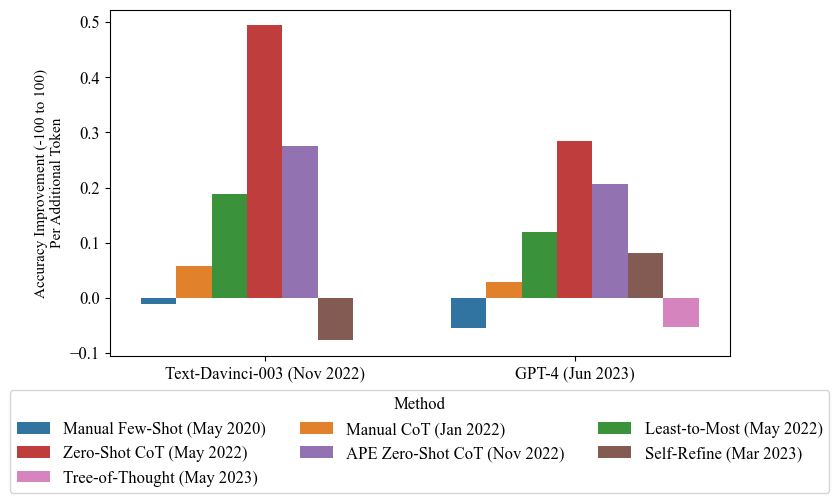

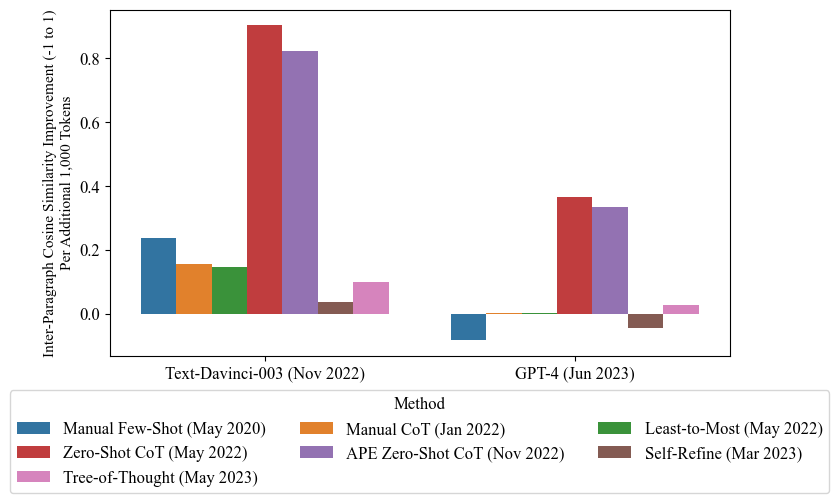

In [123]:
# # Set figure size
# figsize_16_9 = (16, 9)
# # Scaled down a little
# figsize_3_4 = (0.75 * 16, 0.75 * 9)
# figsize_060 = (0.6 * 16, 0.6 * 9)
# # Scaled down
# figsize_half = (8, 4.5)
# # Modified figsize to be a little taller
# figsize_half_tall = (8*0.9, 6.5*0.9)
# # Pick size
# fsize = figsize_half_tall
fontsize_gsm8k = 11
fontsize_cw = 11
# Title padding
title_pad = 0

# Version sorted by ss_publication_date
# Merge on hand_labeled_data
# Add ss_publication_date to averages_for_changes
#print(averages_for_changes)
flattened_cols = [''.join(col).strip().replace('mean', '') for col in averages_for_changes.columns.values]
averages_for_changes.columns = flattened_cols
averages_for_changes_with_date = averages_for_changes.merge(hand_labeled_data, left_on='method', right_on='technique_name', how='left')
# Sort by ss_publication_date
averages_for_changes_with_date = averages_for_changes_with_date.sort_values('ss_publication_date')
print(averages_for_changes_with_date)

# Add Month and Year from the ss_publication_date column to the end of the Method column
averages_for_changes_with_date['Method'] = averages_for_changes_with_date['Method'] + ' (' + pd.to_datetime(averages_for_changes_with_date['ss_publication_date']).dt.strftime('%b %Y') + ')'

# Replace COT with CoT in Method
averages_for_changes_with_date['Method'] = averages_for_changes_with_date['Method'].str.replace('COT', 'CoT')
#print(averages_for_changes_with_date['Method'])

# Add Month and Year to the end of the Model column
# If Model = 'GPT-4', '(June 2023)'
# If Model = 'Text-Davinci-003', '(November 2022)'
averages_for_changes_with_date['Model'] = averages_for_changes_with_date['Model'] + ' ' + averages_for_changes_with_date['Model'].apply(lambda x: '(Jun 2023)' if x == 'GPT-4' else '(Nov 2022)')

# Create averages_for_changes_with_date_gsm8k and averages_for_changes_with_date_cw
averages_for_changes_with_date_gsm8k = averages_for_changes_with_date[averages_for_changes_with_date['task'] == 'gsm8k']
averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvement Per Additional Token'] = averages_for_changes_with_date_gsm8k['change_in_accuracy_quality_per_change_in_conversation_length'] * 100
averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvement Per 1,000 Additional Tokens'] = averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvement Per Additional Token'] * 100 * 1000
averages_for_changes_with_date_cw = averages_for_changes_with_date[averages_for_changes_with_date['task'] == 'cw']
averages_for_changes_with_date_cw['Inter-Paragraph Cosine Similarity Improvement (-1 to 1) Per Additional 1,000 Tokens'] = averages_for_changes_with_date_cw['change_in_accuracy_quality_per_change_in_conversation_length'] * 1000
# Sort dataframes by Model
averages_for_changes_with_date_gsm8k = averages_for_changes_with_date_gsm8k.sort_values(by=['Model'])
averages_for_changes_with_date_cw = averages_for_changes_with_date_cw.sort_values(by=['Model'])
print('split by task')
print(averages_for_changes_gsm8k)
print(averages_for_changes_cw)
#print(averages_for_changes_with_date)

#order_list = averages_for_changes_with_date[['Model', 'method']]
order_list = ['Text-Davinci-003 (Nov 2022)', 'GPT-4 (Jun 2023)']
#hue_order = list(averages_for_changes_with_date[['Method', 'ss_publication_date']].drop_duplicates().sort_values('ss_publication_date')['Method'])
# Separate hue_order for gsm8k and cw
hue_order_gsm8k = list(averages_for_changes_with_date_gsm8k[['Method', 'ss_publication_date']].drop_duplicates().sort_values('ss_publication_date')['Method'])
hue_order_cw = list(averages_for_changes_with_date_cw[['Method', 'ss_publication_date']].drop_duplicates().sort_values('ss_publication_date')['Method'])
#print(hue_order)
print(hue_order_gsm8k)
print(hue_order_cw)

# Plot change in accuracy_quality per change in conversation_length
# Bar chart by model, method, task
# GSM8k plot
plt.figure(figsize=f_size)
#sns.barplot(x='Model', y='Percentage Points Accuracy Improvement Per Additional Token', hue='Method', data=averages_for_changes_gsm8k)
#ax = 
sns.barplot(x='Model', y='Percentage Points Accuracy Improvement Per Additional Token', hue='Method', hue_order=hue_order_gsm8k, data=averages_for_changes_with_date_gsm8k, order=order_list)
#ax.legend(ncol=2, title = 'Method')
#, order=order_list)
#plt.xlabel('Model')
#plt.xlabel('')
#plt.ylabel('Change in GSM8K Accuracy per Change in Conversation Length')
# No x axis title
plt.gca().set_xlabel('')
# Reduce y axis title font size
plt.gca().set_ylabel('Accuracy Improvement (-100 to 100)\nPer Additional Token', fontsize=fontsize_gsm8k)
# Create legend filling rows first
handles, labels = plt.gca().get_legend_handles_labels()
num_cols = 3
plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
#plt.title('Gains v. Direct Prompting - GSM8K - Math Word Problems')#, pad = title_pad)
plt.savefig('../Output/gsm8k_change_in_accuracy_quality_per_change_in_conversation_length_sorted_by_technique_age.png', bbox_inches='tight')
plt.show()

# Creative writing plot
plt.figure(figsize=f_size)
sns.barplot(x='Model', y='Inter-Paragraph Cosine Similarity Improvement (-1 to 1) Per Additional 1,000 Tokens', hue='Method', hue_order=hue_order_cw, data=averages_for_changes_with_date_cw, order=order_list)
#sns.barplot(x='Model', y='change_in_accuracy_quality_per_change_in_conversation_length', hue='Method', data=averages_for_changes_cw)
#plt.xlabel('')
# plt.ylabel('Change in Creative Writing Coherence per Change in Conversation Length')
#plt.title('Change in Creative Writing Coherence per Change in Conversation Length by Model and Method')
# No x axis title
plt.gca().set_xlabel('')
plt.gca().set_ylabel('Inter-Paragraph Cosine Similarity Improvement (-1 to 1)\nPer Additional 1,000 Tokens', fontsize=fontsize_cw)
# Create legend filling rows first
handles, labels = plt.gca().get_legend_handles_labels()
num_cols = 3
plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
#plt.title('Gains v. Direct Prompting - Creative Writing - 2 Paragraphs With Fixed End Sentences')#, pad=title_pad)
plt.savefig('../Output/cw_change_in_accuracy_quality_per_change_in_conversation_length_sorted_by_technique_age_transformed.png', bbox_inches='tight')
plt.show()


### Gains per cost in dollars

In [124]:
# Columns of direct_prompting_comparison
print(list(direct_prompting_comparison.columns))

['model_task_method', 'conversation_number', 'coherence_1_incoherent_10_very_coherent', 'compliance_OLD', 'ease_of_review_1_easy_10_hard', 'correct', 'Prediction_Based_On_First_10', 'Prediction_Based_On_Last_10', 'Aggregated_Prediction', 'Prediction_Based_On_First_10_LP', 'response_Based_On_First_10_LP', 'Prediction_Based_On_Last_10_LP', 'response_Based_On_Last_10_LP', 'response_LP', 'Aggregated_Prediction_LP', 'Prediction_Based_On_First_50_LP', 'response_Based_On_First_50_LP', 'Prediction_Based_On_Last_50_LP', 'response_Based_On_Last_50_LP', 'Aggregated_Prediction_50_LP', 'Prediction_Based_On_random_50_LP_1', 'response_Based_On_random_50_LP_1', 'Prediction_Based_On_random_50_LP_2', 'response_Based_On_random_50_LP_2', 'Aggregated_Prediction_random_50_LP', 'Unnamed: 0_x', 'response_x', 'replace_slash_n_slash_n_with_newline_x', 'replace_slash_n_slash_n_with_newline_values_x', 'replace_slash_n_with_newline_x', 'replace_slash_n_with_newline_values_x', 'avg_cosine_sim', 'num_sentences_x', '

In [125]:
# In the direct_prompting_comparison table, get averages of conversation_length, dp_conversation_length, accuracy_quality, dp_accuracy_quality by model, method, task
averages_for_changes_cost = direct_prompting_comparison[['model', 'method', 'task', 'conversation_cost', 'dp_conversation_cost', 'accuracy_quality_avg_inter_paragraph_cosine_sim', 'dp_accuracy_quality_avg_inter_paragraph_cosine_sim']].groupby(['model', 'method', 'task']).agg(['mean']).reset_index()

# Compute change in accuracy_quality per change in conversation_length
# accuracy_quality - dp_accuracy_quality
# divided by
# conversation_length - dp_conversation_length
averages_for_changes_cost['change_in_accuracy_quality_per_change_in_conversation_cost'] = (averages_for_changes_cost['accuracy_quality_avg_inter_paragraph_cosine_sim']['mean'] - averages_for_changes_cost['dp_accuracy_quality_avg_inter_paragraph_cosine_sim']['mean']) / (averages_for_changes_cost['conversation_cost']['mean'] - averages_for_changes_cost['dp_conversation_cost']['mean'])

In [126]:
# Transformed version per penny for both
averages_for_changes_cost['change_in_accuracy_quality_per_change_in_conversation_cost_per_penny'] = averages_for_changes_cost['change_in_accuracy_quality_per_change_in_conversation_cost'] / 100

In [127]:
# Recode 'model' as 'Model' - change gpt4 to "GPT-4" and td3 to "Text-Davinci-003"
averages_for_changes_cost['Model'] = averages_for_changes_cost['model'].replace({'gpt4': 'GPT-4', 'td3': 'Text-Davinci-003'})
# Recode 'method' as 'Method' - change ape_zero_shot_cot to "APE Zero-Shot COT", zero_shot_cot to "Zero-Shot COT", least_to_most to "Least-to-Most", manual_cot to "Manual COT", manual_few_shot to "Manual Few-Shot", self_refine to "Self-Refine", tree_of_thought to "Tree-of-Thought"
averages_for_changes_cost['Method'] = averages_for_changes_cost['method'].replace({'ape_zero_shot_cot': 'APE Zero-Shot COT', 'zero_shot_cot': 'Zero-Shot COT', 'least_to_most': 'Least-to-Most', 'manual_cot': 'Manual COT', 'manual_few_shot': 'Manual Few-Shot', 'self_refine': 'Self-Refine', 'tree_of_thought': 'Tree-of-Thought'})

In [128]:
#averages_for_changes_cost_gsm8k = averages_for_changes_cost[averages_for_changes_cost['task'] == 'gsm8k']

#averages_for_changes_cost_cw = averages_for_changes_cost[averages_for_changes_cost['task'] == 'cw']

   model             method   task  conversation_cost  dp_conversation_cost  \
21   td3    manual_few_shot  gsm8k           0.010679              0.001741   
6   gpt4    manual_few_shot     cw           0.029396              0.018263   
7   gpt4    manual_few_shot  gsm8k           0.017756              0.006626   
20   td3    manual_few_shot     cw           0.013908              0.004008   
4   gpt4         manual_cot     cw           0.037068              0.018263   
5   gpt4         manual_cot  gsm8k           0.028757              0.006626   
19   td3         manual_cot  gsm8k           0.014454              0.001741   
18   td3         manual_cot     cw           0.019210              0.004008   
2   gpt4      least_to_most     cw           0.042838              0.018263   
3   gpt4      least_to_most  gsm8k           0.014497              0.006626   
17   td3      least_to_most  gsm8k           0.005445              0.001741   
16   td3      least_to_most     cw           0.02050

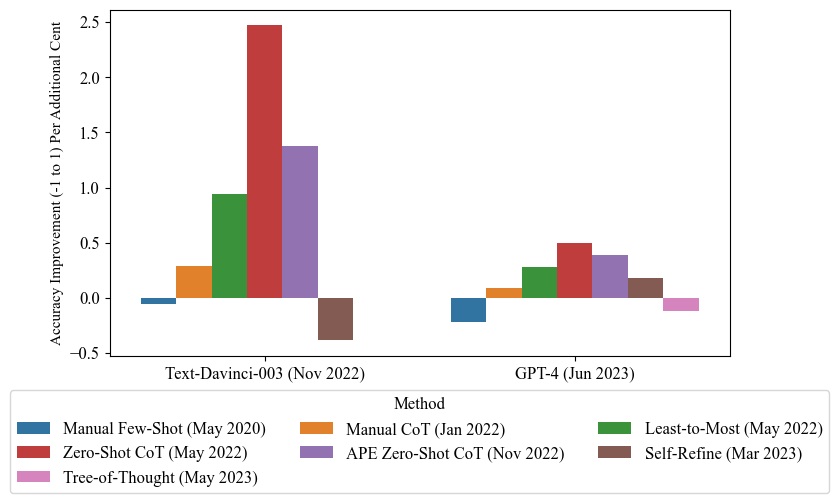

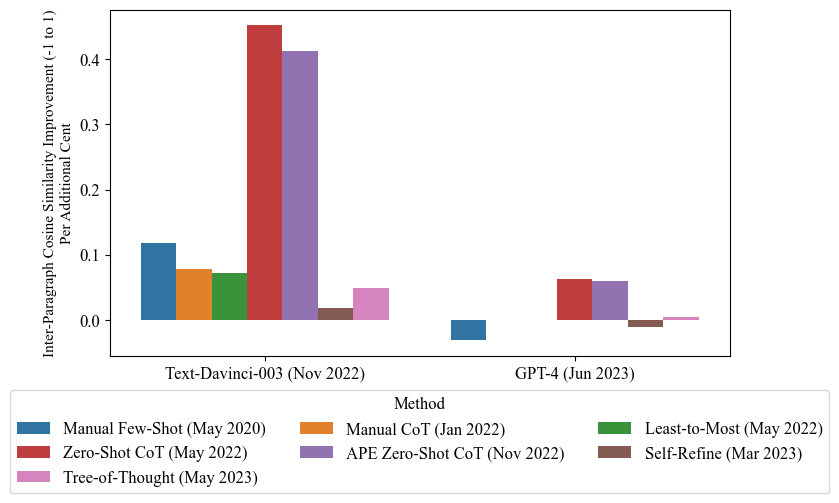

In [129]:
# # Set figure size
# figsize_16_9 = (16, 9)
# # Scaled down a little
# figsize_3_4 = (0.75 * 16, 0.75 * 9)
# figsize_060 = (0.6 * 16, 0.6 * 9)
# # Scaled down
# figsize_half = (8, 4.5)
# # Modified figsize to be a little taller
# figsize_half_tall = (8*0.9, 6.5*0.9)
# # Pick size
# fsize = figsize_half_tall
fontsize_gsm8k = 11
fontsize_cw = 11
# Title padding
title_pad = 0

# Version sorted by ss_publication_date
# Merge on hand_labeled_data
# Add ss_publication_date to averages_for_changes
#print(averages_for_changes)
flattened_cols = [''.join(col).strip().replace('mean', '') for col in averages_for_changes_cost.columns.values]
averages_for_changes_cost.columns = flattened_cols
averages_for_changes_cost_with_date = averages_for_changes_cost.merge(hand_labeled_data, left_on='method', right_on='technique_name', how='left')
# Sort by ss_publication_date
averages_for_changes_cost_with_date = averages_for_changes_cost_with_date.sort_values('ss_publication_date')
print(averages_for_changes_cost_with_date)

# Add Month and Year from the ss_publication_date column to the end of the Method column
averages_for_changes_cost_with_date['Method'] = averages_for_changes_cost_with_date['Method'] + ' (' + pd.to_datetime(averages_for_changes_cost_with_date['ss_publication_date']).dt.strftime('%b %Y') + ')'

# Replace COT with CoT in Method
averages_for_changes_cost_with_date['Method'] = averages_for_changes_cost_with_date['Method'].str.replace('COT', 'CoT')
#print(averages_for_changes_with_date['Method'])

# Add Month and Year to the end of the Model column
# If Model = 'GPT-4', '(June 2023)'
# If Model = 'Text-Davinci-003', '(November 2022)'
averages_for_changes_cost_with_date['Model'] = averages_for_changes_cost_with_date['Model'] + ' ' + averages_for_changes_cost_with_date['Model'].apply(lambda x: '(Jun 2023)' if x == 'GPT-4' else '(Nov 2022)')

# Create averages_for_changes_with_date_gsm8k and averages_for_changes_with_date_cw
averages_for_changes_cost_with_date_gsm8k = averages_for_changes_cost_with_date[averages_for_changes_cost_with_date['task'] == 'gsm8k']
#averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvement Per Additional Token'] = averages_for_changes_with_date_gsm8k['change_in_accuracy_quality_per_change_in_conversation_length'] * 100
#averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvement Per 1,000 Additional Tokens'] = averages_for_changes_with_date_gsm8k['Percentage Points Accuracy Improvement Per Additional Token'] * 100 * 1000
averages_for_changes_cost_with_date_cw = averages_for_changes_cost_with_date[averages_for_changes_cost_with_date['task'] == 'cw']
#averages_for_changes_with_date_cw['Inter-Paragraph Cosine Similarity Improvement (-1 to 1) Per Additional 1,000 Tokens'] = averages_for_changes_with_date_cw['change_in_accuracy_quality_per_change_in_conversation_length'] * 1000
# Sort dataframes by Model
averages_for_changes_cost_with_date_gsm8k = averages_for_changes_cost_with_date_gsm8k.sort_values(by=['Model'])
averages_for_changes_cost_with_date_cw = averages_for_changes_cost_with_date_cw.sort_values(by=['Model'])
#print('split by task')
#print(averages_for_changes_gsm8k)
#print(averages_for_changes_cw)
#print(averages_for_changes_with_date)

#order_list = averages_for_changes_with_date[['Model', 'method']]
order_list = ['Text-Davinci-003 (Nov 2022)', 'GPT-4 (Jun 2023)']
#hue_order = list(averages_for_changes_with_date[['Method', 'ss_publication_date']].drop_duplicates().sort_values('ss_publication_date')['Method'])
# Separate hue_order for gsm8k and cw
hue_order_gsm8k = list(averages_for_changes_cost_with_date_gsm8k[['Method', 'ss_publication_date']].drop_duplicates().sort_values('ss_publication_date')['Method'])
hue_order_cw = list(averages_for_changes_cost_with_date_cw[['Method', 'ss_publication_date']].drop_duplicates().sort_values('ss_publication_date')['Method'])
#print(hue_order)
print(hue_order_gsm8k)
print(hue_order_cw)

# Plot change in accuracy_quality per change in conversation_length
# Bar chart by model, method, task
# GSM8k plot
plt.figure(figsize=f_size)
#sns.barplot(x='Model', y='Percentage Points Accuracy Improvement Per Additional Token', hue='Method', data=averages_for_changes_gsm8k)
#ax = 
sns.barplot(x='Model', y='change_in_accuracy_quality_per_change_in_conversation_cost_per_penny', hue='Method', hue_order=hue_order_gsm8k, data=averages_for_changes_cost_with_date_gsm8k, order=order_list)
#ax.legend(ncol=2, title = 'Method')
#, order=order_list)
#plt.xlabel('Model')
#plt.xlabel('')
#plt.ylabel('Change in GSM8K Accuracy per Change in Conversation Length')
# No x axis title
plt.gca().set_xlabel('')
# Reduce y axis title font size
plt.gca().set_ylabel('Accuracy Improvement (-1 to 1) Per Additional Cent', fontsize=fontsize_gsm8k)
# Create legend filling rows first
handles, labels = plt.gca().get_legend_handles_labels()
num_cols = 3
plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
#plt.title('Gains v. Direct Prompting - GSM8K - Math Word Problems')#, pad = title_pad)
plt.savefig('../Output/gsm8k_change_in_accuracy_quality_per_change_in_cost_sorted_by_technique_age.png', bbox_inches='tight')
plt.show()

# Creative writing plot
plt.figure(figsize=f_size)
sns.barplot(x='Model', y='change_in_accuracy_quality_per_change_in_conversation_cost_per_penny', hue='Method', hue_order=hue_order_cw, data=averages_for_changes_cost_with_date_cw, order=order_list)
#sns.barplot(x='Model', y='change_in_accuracy_quality_per_change_in_conversation_length', hue='Method', data=averages_for_changes_cw)
#plt.xlabel('')
# plt.ylabel('Change in Creative Writing Coherence per Change in Conversation Length')
#plt.title('Change in Creative Writing Coherence per Change in Conversation Length by Model and Method')
# No x axis title
plt.gca().set_xlabel('')
plt.gca().set_ylabel('Inter-Paragraph Cosine Similarity Improvement (-1 to 1)\nPer Additional Cent', fontsize=fontsize_cw)
# Create legend filling rows first
handles, labels = plt.gca().get_legend_handles_labels()
num_cols = 3
plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
#plt.title('Gains v. Direct Prompting - Creative Writing - 2 Paragraphs With Fixed End Sentences')#, pad=title_pad)
plt.savefig('../Output/cw_change_in_accuracy_quality_per_change_in_cost_sorted_by_technique_age_transformed.png', bbox_inches='tight')
plt.show()